# Bayesian networks learning

---

## General workflow

In this case, we do not have any data at hand but simply define the prior distributions and rank correlation by ourselves. Therefore, the workflow is pretty simple here:

- Define the structure of the BN
- Define the distributions of the nodes and their rank correlation
- Compute the conditional rank correlation
- Visualization
- Evaluation
- Make inference

## Self-learning questions

### `genextreme` distributions

What is the `genextreme` distribution defined in the node?

- The full name of the `genextreme` distribution is the **generalized extreme value (GEV) distribution**, which is developed within extreme value theory.
- Gumbel, Frechet, and Weibull distributions are known as type type I, II and III extreme value distribution.

What properties does it have? 

- GEV distributions have three parameters $\mu \in \mathbb{R}$, $\sigma > 0$, and $\xi \in \mathbb{R}$ for the location, scale, and shape, respectively.

What purpose is it used for?

- The GEV distribution the only possible limit distribution of properly normalized maxima of a sequence of i.i.d. random variables.
- It is often used to model the maxima of long (finite) sequences of random variables.

### Conditional rank correlation matrix

What is the difference between the conditional rank correlation matrix and the defined rank correlation matrix?

- The conditional rank correlation (or partial correlation) take into account the effect of conditions, whereas the value defined in the rank correlation matrix at the beginning refers to the unconditional one.
- Such dependenciy relation contaminate the correlation between random variables, which need to be considered.

### Inference

What does the inference here refer to?

- The inference here refers to the process of computing the posterior distribution of certain variables given observed evidence, taking into account the entire structure and dependencies of the BN.
- In this case, given the conditionalized variable V1 and its value, we would like to compute the posterior distributions of $P(X|V_1)$, where $X$ refers to all the rest variables in the BN.

# Example 0

---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from py_banshee.rankcorr import bn_rankcorr
from py_banshee.bn_plot import bn_visualize
from py_banshee.prediction import inference, conditional_margins_hist

In [3]:
# Nodes (variables) of the BN
node_names = ['V1', 'V2', 'V3']
node_num = len(node_names)

# Structure of the BN
parent_cells = [None] * node_num
parent_cells[0] = []
parent_cells[1] = [0]
parent_cells[2] = [0, 1]

# Parametric distributions of the nodes
node_dists = ['norm', 'genextreme', 'norm']
node_params = [[100, 23], [-0.15, 130, 50], [500, 100]]

# Rank correlation matrix
rank_corr = [None] * node_num
rank_corr[0] = []
rank_corr[1] = [0.1]
rank_corr[2] = [0.41, -0.25]

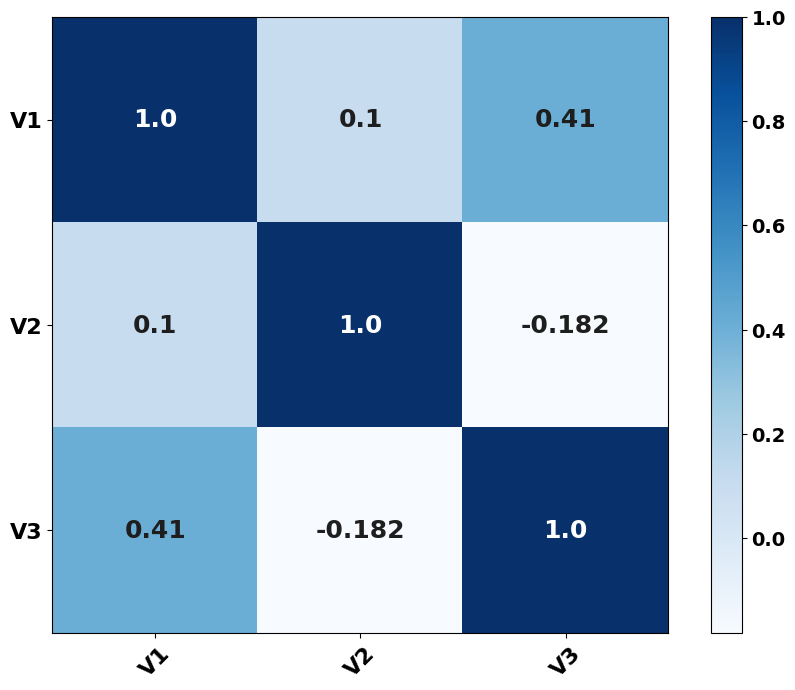

In [4]:
# Conditional rank correlation matrix
R = bn_rankcorr(parent_cells, rank_corr, var_names=node_names, is_data=False, plot=True)

In [5]:
# Visulize the BN
bn_visualize(parent_cells, R, node_names, fig_name='bn_test')

'BN plot saved in : c:\\Users\\yzhang11\\OneDrive - Delft University of Technology\\Personal Files\\Education\\Learning materials\\Repositories\\Heaven-of-Learning\\py_banshee_learning\\BN_visualize_bn_test.pdf'

In [6]:
# Inference
cond_nodes = [0] # conditionalized variable (node V1)
cond_values = [181] # conditionalized value (node V1)

F = inference(Nodes=cond_nodes, Values=cond_values, R=R, DATA=[],
              SampleSize=100000, empirical_data=False,
              distributions=node_dists, parameters=node_params, Output='full')

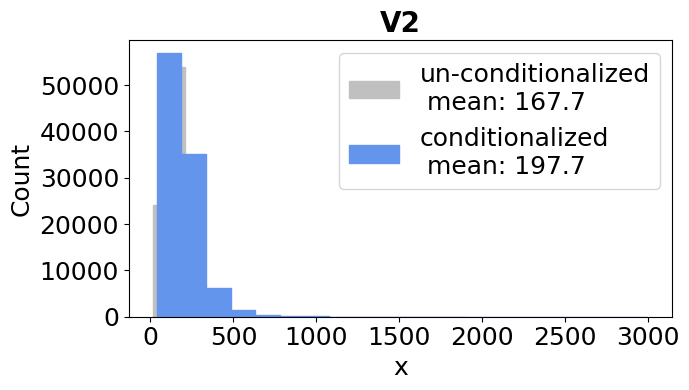

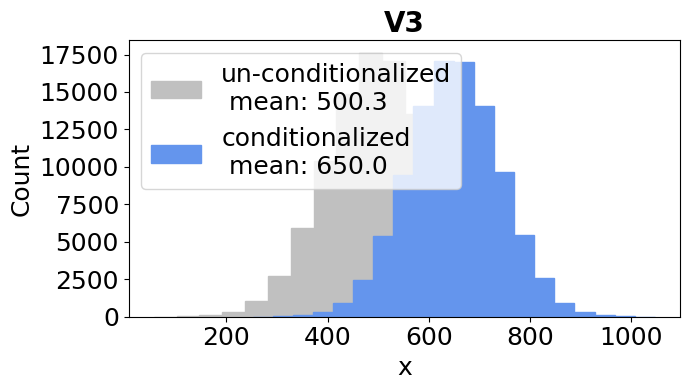

In [7]:
# Conditional and un-conditional histograms
conditional_margins_hist(F, [], node_names, cond_nodes, empirical_data=False,
                         distributions=node_dists, parameters=node_params)

# Example 1

---

In [8]:
from py_banshee.rankcorr import bn_rankcorr
from py_banshee.bn_plot import bn_visualize
from py_banshee.prediction import inference, conditional_margins_hist

In [9]:
# Nodes of the BN
node_names = ['W', 'AX1', 'AX2', 'AX3']
node_num = len(node_names)

# Structure of the BN
parent_cells = [None] * node_num
parent_cells[0] = [1, 2, 3]
parent_cells[1] = []
parent_cells[2] = [1]
parent_cells[3] = [2]

# Parametric distributions of the nodes
node_dists = ['norm', 'genextreme', 'norm', 'genextreme']
node_params = [
    [192.52, 29.33], [0.16, 54.48, 10.96], [87.93, 12.84], [0.085, 41.53, 8.95]
    ]

# Un-conditional rank correlation matrix
rank_corr = [None] * node_num
rank_corr[0] = [0.83, 0.9, 0.86]
rank_corr[1] = []
rank_corr[2] = [0.6]
rank_corr[3] = [0.76]

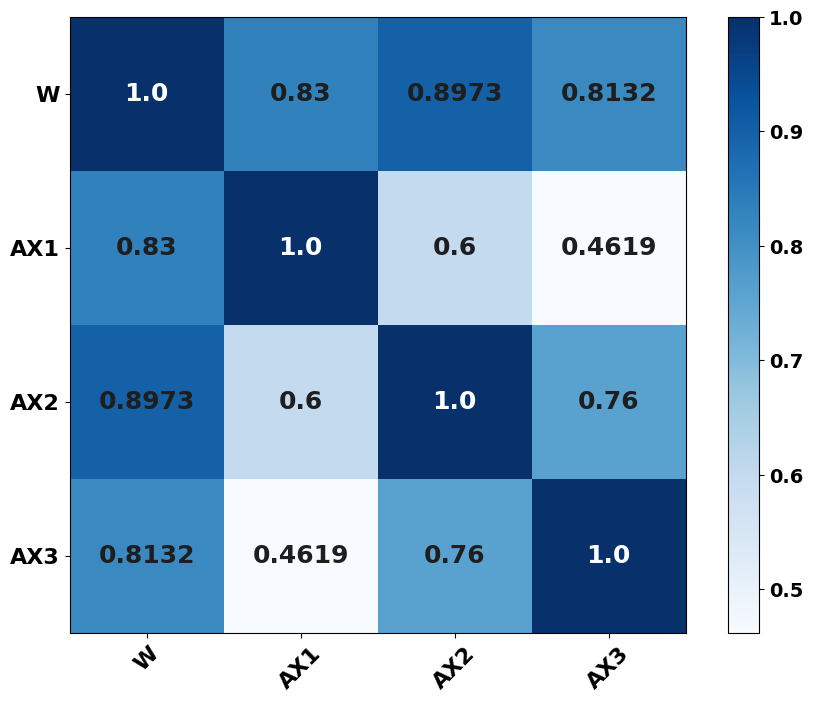

In [10]:
# Conditional rank correlation matrix
R = bn_rankcorr(parent_cells, rank_corr, var_names=node_names, is_data=False, plot=True)

In [11]:
# Visualize the BN
bn_visualize(parent_cells, R, node_names, fig_name='example_1')

'BN plot saved in : c:\\Users\\yzhang11\\OneDrive - Delft University of Technology\\Personal Files\\Education\\Learning materials\\Repositories\\Heaven-of-Learning\\py_banshee_learning\\BN_visualize_example_1.pdf'

In [12]:
# Inference
cond_nodes = [0] # conditionalized variable (node W)
cond_values = [400] # conditionalized value (node W)

F = inference(Nodes=cond_nodes, Values=cond_values, R=R,
              DATA=[], SampleSize=1000, empirical_data=False,
              distributions=node_dists, parameters=node_params, Output='full')

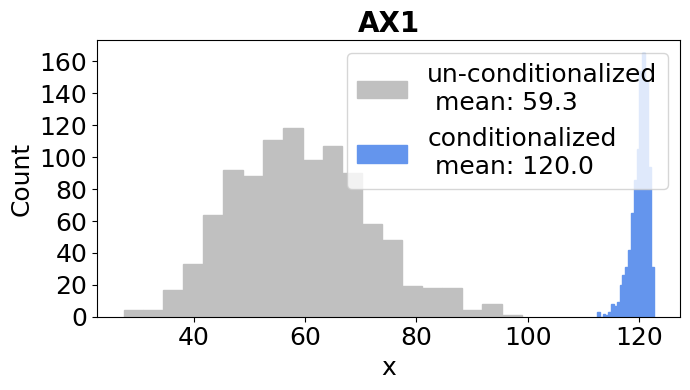

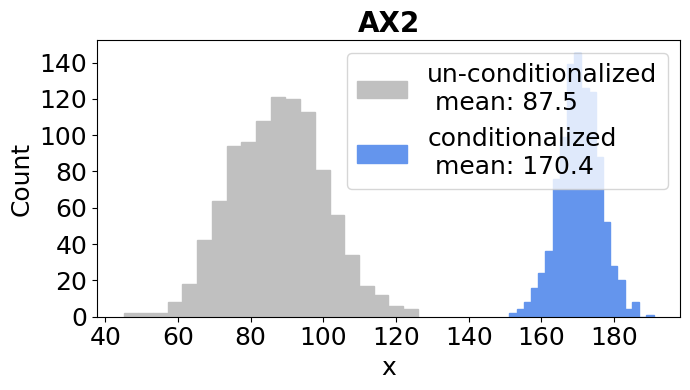

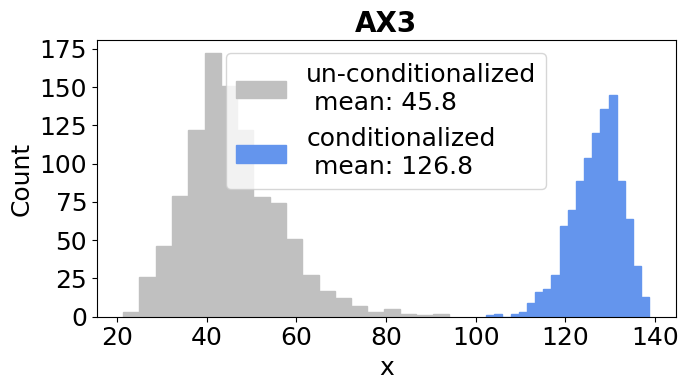

In [13]:
# Conditional and un-conditional histograms
conditional_margins_hist(F, [], node_names, cond_nodes, empirical_data=False,
                         distributions=node_dists, parameters=node_params)

# Example 2

---

## Self-learning questions


### Cramer-von Mises criterion

What is the Cramer-von Mises criterion and what is it used for?

- The Cramer-von Mises criterion is a metric used to evaluate the goodness of fit of a CDF $F^*$ compared to a given ECDF $F_n$ (also called the one-sample case) or for comparing two empirical distributions (i.e., two-sample case). It is defined as:

$$ \omega^2 = \int_{-\infty}^{\infty} [F_n(x) - F^*(x)]^2 dF^*(x).$$

How is the Cramer-von Mises criterion used in this case? How is the goodness of fit computed? Why can this metric be used to estimate the suitability of a copula?

- In Bayesian networks, the bivariate dependencies between variables are modeled by copulas. Therefore, the Cramer-von Mises criterion in this case measures the distance between the parameteric and empirical copulas of bivariate distributions.
- According to the structure of the Bayesian network, the probability distribution of a random variable $V_2$ with only one affiliated parent node $V_1$ can be written as $P(V_2|V_1) = \frac{P(V_2, V_1)}{P(V_1)}$. The bivariate joint distribution in this case is thus modeled by a copula function $C(F(V_1), F(V_2))$ and its empirical distribution function is denoted as $F_n(V_1, V_2)$.
- From this, we can know that the Cramer-von Mises criterion measures the difference between $C$ and $F_n$.

### D-calibration score

What is the d-calibration score? What does it represent in this case?

- The d-calibration score here compares the empirical rank correlation matrix with the BN and empirical normal rank correlation matrices based on distance measure.
- The d-calibration score ranges from 0 to 1, which correspond to be totally different and similar, respectively.
- The distance between ERC and NRC informs whether the joint distribution can be assumed to be Gaussian.
- The distance between NRC and BNRC informs whether the assumption of the normal joint distribution is valid for NPBNs.
- The distance between ERC and BNRC represents how well the constructed BNRC model can fit the data.

### ERC, NRC, BNRC

What do these acronyms represent?

- ERC: Empirical rank correlation
- NRC: Empirical normal rank correlation
- BNRC: Bayesian network's rank correlation

What do NRC and BNRC mean more specifically? How are they computed and what do they stand for?

- NRC is computed based on the rank of the data transformed to the Gaussian distribution.
- BNRC is computed by sampling from the BN model and its rank.

### Determinant of the rank correlation matrix

Why use the determinant of the rank correlation matrix?

- The rank correlation matrix describes the dependencies or correlations of the variables and summarizes in the form of a matrix.
- The determinant of a rank correlation matrix uses a scale value to give information about how much "volume" the data is spread in a multivariate space and how much variance is captured by the variables together. 

### Hellinger distance

What is the Hellinger distance and what is it used for?

- The Hellinger distance is a metric in probability and statistics used to quantify the difference between two probability distributions.
- It is a special case of f-divergence. Another well-known special case of f-divergence refers to KL-divergence, which is also commonly used to measure the difference of two distributions.

How is the Hellinger defined?

- Given two probability measure $P$ and $Q$ on a measure space $\chi$ and an axiliary measure $\lambda$, the square of the Hellinger distance $H$ between $P$ and $Q$ is defined as:

$$ H^2(P, Q) = \frac{1}{2} \int_\chi{\left(\sqrt{p(x)} - \sqrt{q(x)} \right)^2} \lambda (dx), $$

where $P(dx) = p(x)\lambda(dx)$ and $Q(dx) = q(x)\lambda(dx)$, i.e., the Radon-Nikodym derivatives of P and Q with respect to $\lambda$, respectively. The definition does not depend on $\lambda$.

- The Hellinger distance can be also written as:

$$ H^2(P, Q) = \frac{1}{2} \int_\chi{\left(\sqrt{P(dx)} - \sqrt{Q(dx)} \right)^2} .$$

### Goodness of fit and distance between distributions

What is the difference between the concept of goodness of fit and distribution distance? Can they be used interchangably?

- Goodness of fit is a more general method or concept that focused on the evaluation of how well a model fit the observed data.
- The distance between distributions, such as the Hellinger distance, is a specific measure that quantifies the distance or similarity of two distributions.
- Although both metrics or concepts can provide information about the accuracy of a fitted probabilistic model, the distribution distance does not internally contain a formal decision-making framework to judge whether a fitted model is good enough or not. Whereas in goodness of fit, it provides p-value as a decision support criterion.


In [14]:
import numpy as np
import pandas as pd

from py_banshee.rankcorr import bn_rankcorr
from py_banshee.bn_plot import bn_visualize
from py_banshee.copula_test import cvm_statistic
from py_banshee.d_cal import gaussian_distance
from py_banshee.prediction import inference

np.random.seed(123)

In [15]:
# Load data
data = pd.read_csv('py_banshee_examples/cities.csv')
data.head()

,climate,housing,health,safety,transportation,education,arts,recreation,economics
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


In [16]:
# Select the columns of interest
cols = [0, 6, 7, 8, 3] # climate, arts, recreation, economics, safety
data = data.iloc[:, cols]

# Nodes of the BN
node_names = list(data.columns)
node_num = len(node_names)

# Output figure name
fig_name = 'bn_cities'

In [17]:
# Inspect the data
data.head()

,climate,arts,recreation,economics,safety
0,521,996,1405,7633,923
1,575,5564,2632,4350,886
2,468,237,859,5250,970
3,476,4655,1617,5864,610
4,659,4496,2612,5727,1483


In [18]:
# Structure of the BN
parent_cells = [None] * node_num
parent_cells[0] = []           # climate (no parents)
parent_cells[1] = [2]          # arts (parents: recreation)
parent_cells[2] = [3, 0]       # recreation (parents: economics, climate)
parent_cells[3] = []           # economics (no parents)
parent_cells[4] = [1, 2, 3, 0] # safety (parents: all other variables)

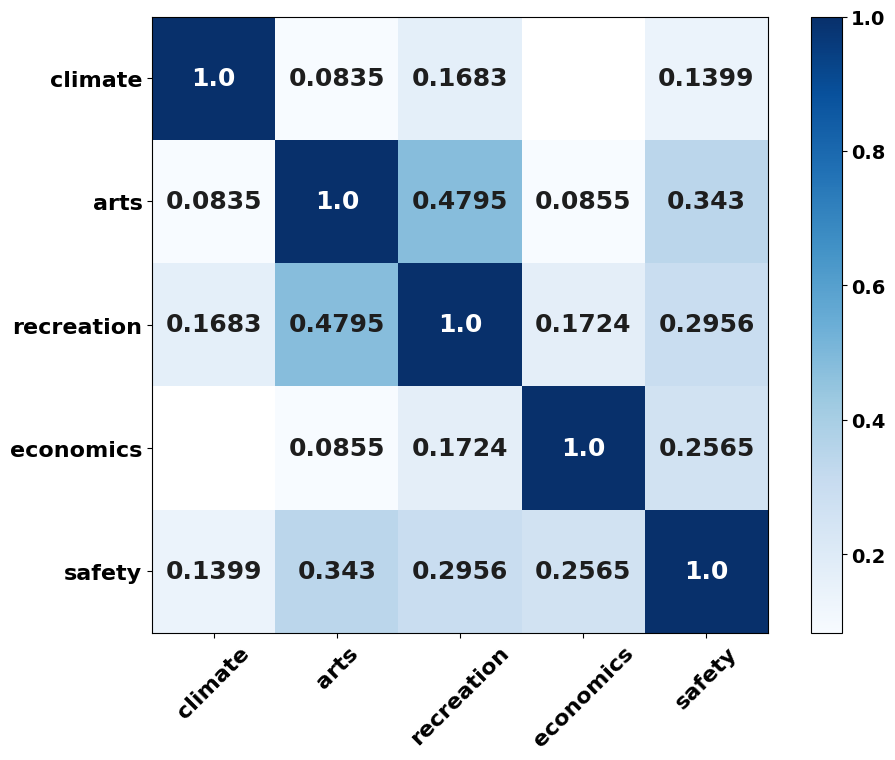

In [19]:
# Conditional rank correlation matrix
R = bn_rankcorr(parent_cells, data, var_names=node_names, is_data=True, plot=True)

In [20]:
# Visualize the BN
bn_visualize(parent_cells, R, node_names, fig_name=fig_name)

'BN plot saved in : c:\\Users\\yzhang11\\OneDrive - Delft University of Technology\\Personal Files\\Education\\Learning materials\\Repositories\\Heaven-of-Learning\\py_banshee_learning\\BN_visualize_bn_cities.pdf'

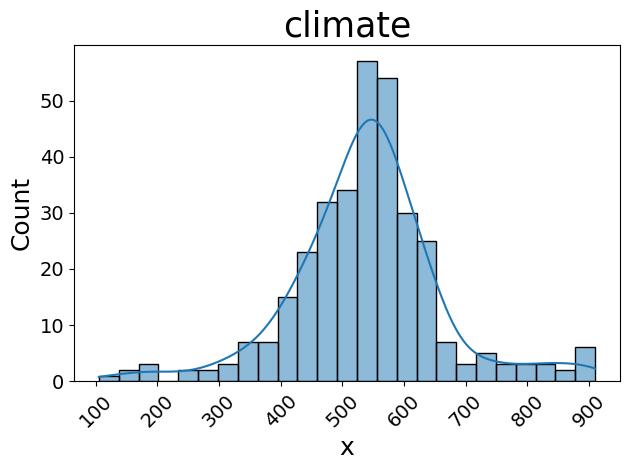

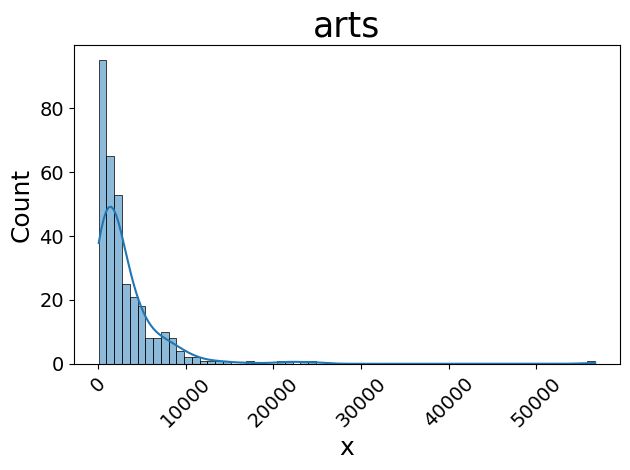

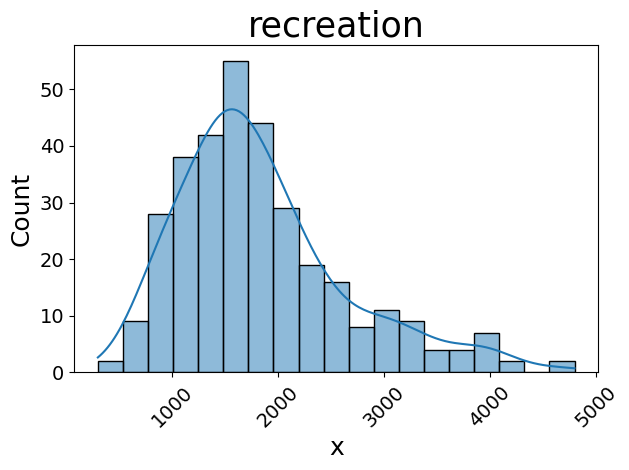

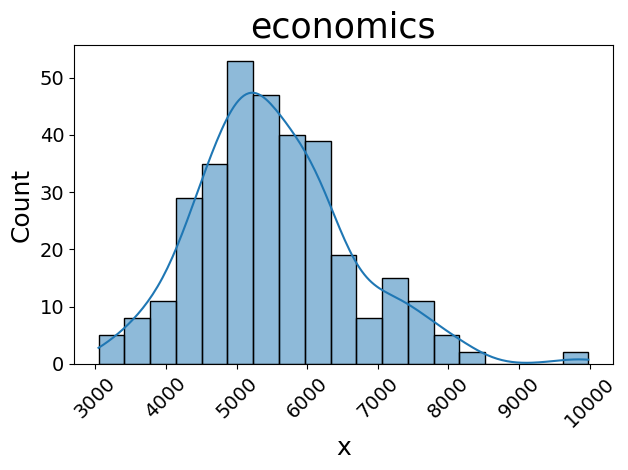

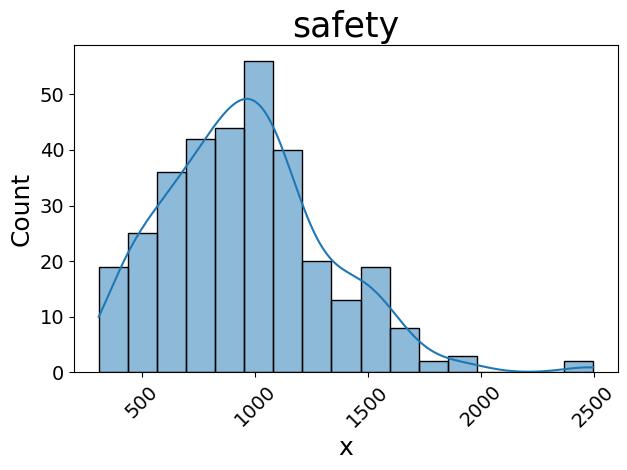

'BN plot saved in : c:\\Users\\yzhang11\\OneDrive - Delft University of Technology\\Personal Files\\Education\\Learning materials\\Repositories\\Heaven-of-Learning\\py_banshee_learning\\BN_visualize_bn_cities_margins.pdf'

In [21]:
# Visualize the BN with marginal distributions
bn_visualize(parent_cells, R, node_names, data=data, fig_name=fig_name + '_margins')

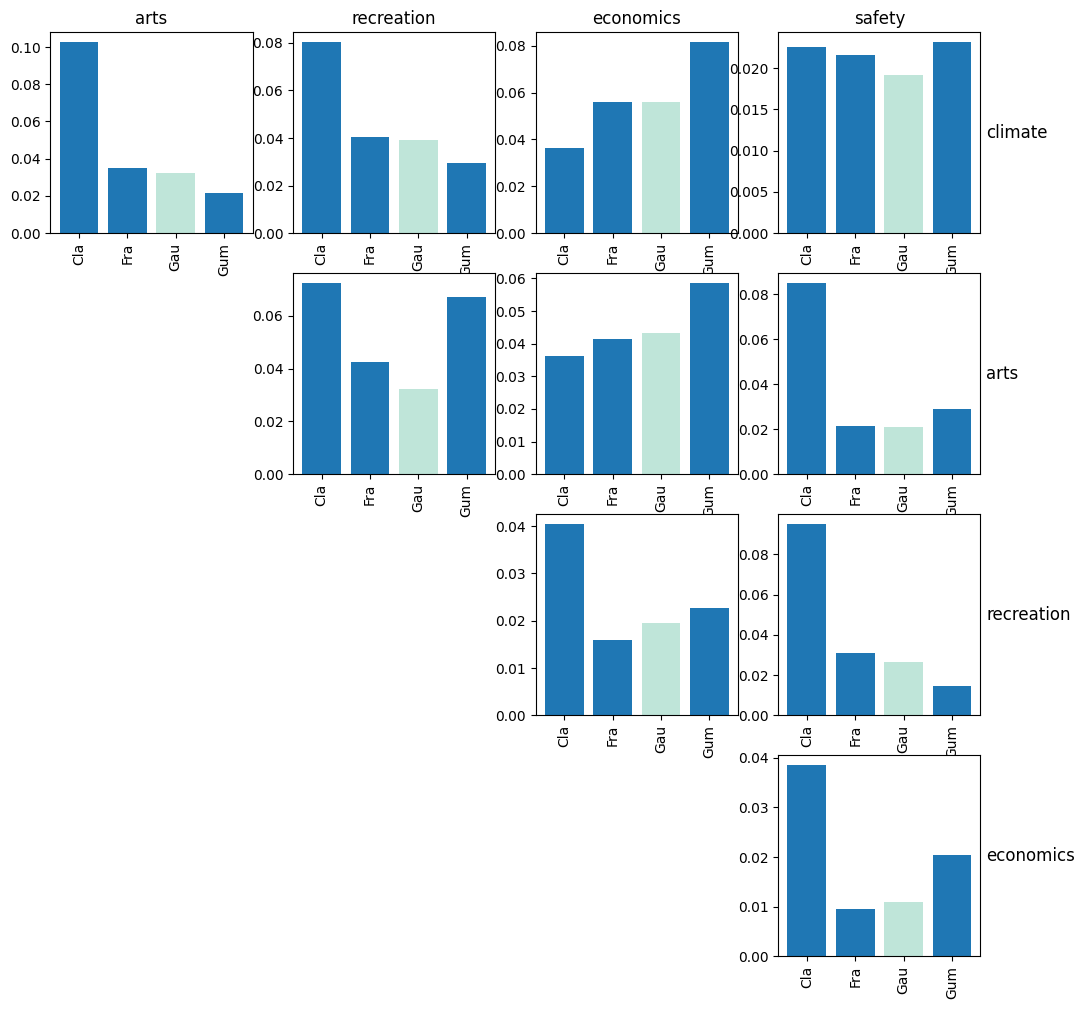

In [22]:
# CVM statistics to test the goodness of fit of the Gaussian copula
M = cvm_statistic(data, names=node_names, plot=True, fig_name=fig_name)

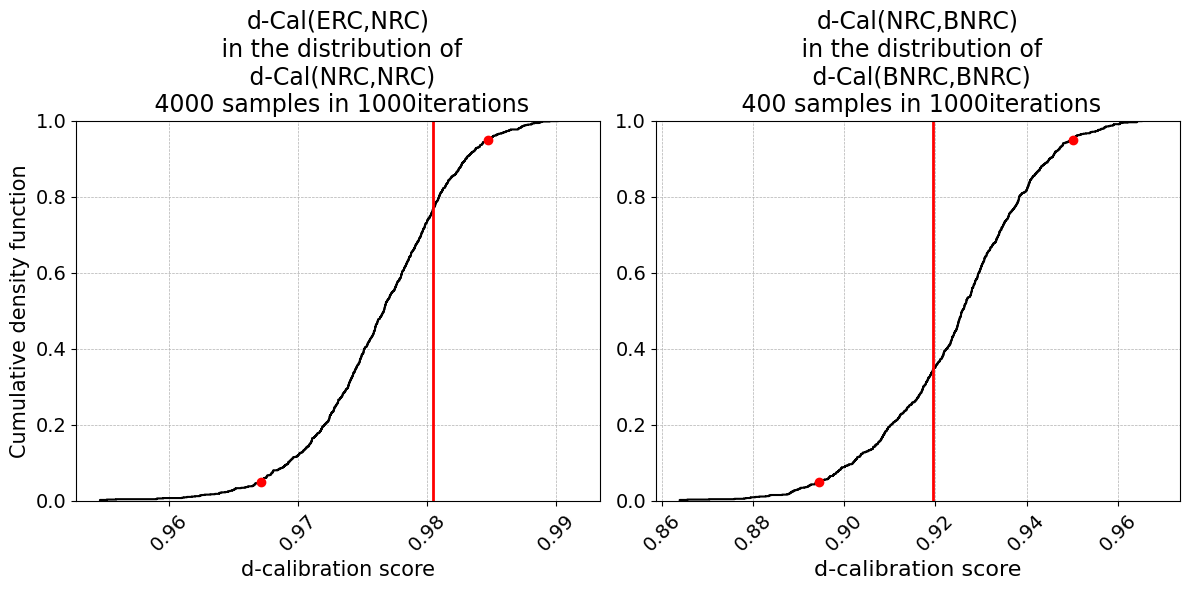

SUCCESS: The d-Cal of the empirical rank correlation matrix (ERC) fall between the confidence intervals of the d-Cal of the normal rank correlation matrix (NRC)

SUCCESS: The d-Cal of the normal rank correlation matrix (NRC) fall between the confidence intervals of the d-Cal of the BN rank correlation matrix (BNRC)



In [23]:
# Measure the d-calibration score
D_ERC,B_ERC,D_BNRC,B_BNRC = gaussian_distance(
    R,                # rank correlation matrix 
    data,             # DataFrame with data
    4000,             # number of samples drawn d-Cal (ERC, NRC)
    400,              # number of samples drawn d-Cal (NRC, BNRC)
    1000,             # number of iterations to compute CI
    Plot=True,        # create a plot (0 = don't create plot)
    Type='H',         # take Hellinger distance (default)
    fig_name=fig_name # figure name
    )

In [24]:
# Inference
cond_nodes = [0, 1, 2, 3] # conditionalized variables (all variables other than safety)
cond_values = data.iloc[:, cond_nodes].to_numpy() # conditionalized values

F = inference(cond_nodes, cond_values, R, data, Output='mean')

# Evaluation
y_pred = F.squeeze()

# 
y_true = data.iloc[:, 4].to_numpy()

# Calculate coefficent of determination (R^2)
A = (y_pred - y_pred.mean(axis=0)) / y_pred.std(axis=0)
B = (y_true - y_true.mean(axis=0)) / y_true.std(axis=0)
correlation = np.dot(B, A.T) / B.shape[0]
R2 = correlation ** 2

# Calculate the mean absolute error
MAE = np.mean(np.abs(y_true - y_pred))

# Calculate tge mean bias error
MBS = np.mean(y_true - y_pred)

# Calculate the root mean squared error
RMSE = np.sqrt(np.mean((y_true - y_pred) ** 2))

Making inference. Progress:  0%
Making inference. Progress:  0%
Making inference. Progress:  0%
Making inference. Progress:  0%
Making inference. Progress:  1%
Making inference. Progress:  1%
Making inference. Progress:  1%
Making inference. Progress:  2%
Making inference. Progress:  2%
Making inference. Progress:  2%
Making inference. Progress:  3%
Making inference. Progress:  3%
Making inference. Progress:  3%
Making inference. Progress:  3%
Making inference. Progress:  4%
Making inference. Progress:  4%
Making inference. Progress:  4%
Making inference. Progress:  5%
Making inference. Progress:  5%
Making inference. Progress:  5%
Making inference. Progress:  6%
Making inference. Progress:  6%
Making inference. Progress:  6%
Making inference. Progress:  6%
Making inference. Progress:  7%
Making inference. Progress:  7%
Making inference. Progress:  7%
Making inference. Progress:  8%
Making inference. Progress:  8%
Making inference. Progress:  8%
Making inference. Progress:  9%
Making i